[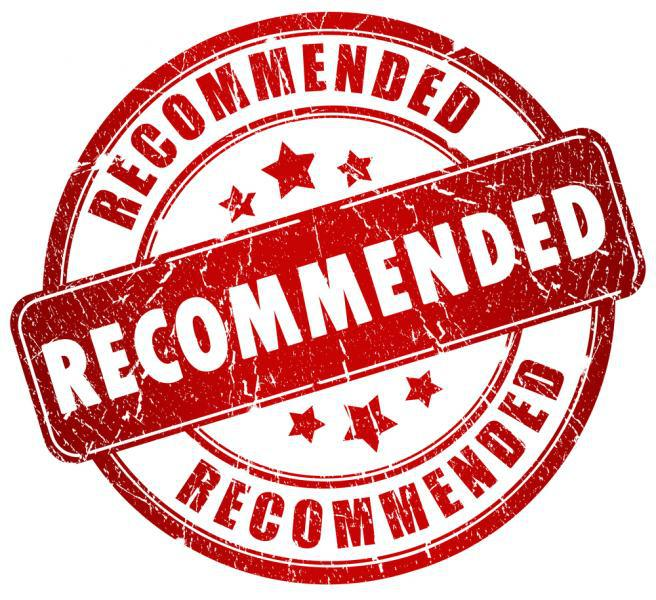](http://)

##  Hybrid Recommender  :

### Business Problem :

* Estimate using item-based and user-based recommender methods for the user whose ID is given.

### Dataset Story :

* The dataset is the movie provided by MovieLens, a recommendation service. It contains the scores made for these movies. It includes 27.2 2.000.0263 movies. This path is targeted by 138,493 users between January 09, 1995 and March 31, 2015. This data set is used on 17 October 2016. All selected users teach at least 20 movies the information they give.

### Variables :

* title – Movie name
* userid – Unique user.
* (UniqueID)movieId – Unique movie.
* (UniqueID)rating – User-rated movie
* timestamp – Evaluation date

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-20m-dataset/rating.csv
/kaggle/input/movielens-20m-dataset/link.csv
/kaggle/input/movielens-20m-dataset/genome_tags.csv
/kaggle/input/movielens-20m-dataset/genome_scores.csv
/kaggle/input/movielens-20m-dataset/tag.csv
/kaggle/input/movielens-20m-dataset/movie.csv


In [2]:
import pandas as pd
pd.set_option('display.max_columns', 5)

In [3]:
def create_user_movie_df():
    import pandas as pd
    movie = pd.read_csv('../input/movielens-20m-dataset/movie.csv')
    rating = pd.read_csv('../input/movielens-20m-dataset/rating.csv')
    df = movie.merge(rating, how="left", on="movieId")
    comment_counts = pd.DataFrame(df["title"].value_counts())
    rare_movies = comment_counts[comment_counts["title"] <= 1000].index
    common_movies = df[~df["title"].isin(rare_movies)]
    user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
    return user_movie_df

user_movie_df = create_user_movie_df()

In [4]:
# Determine the movies watched by the user to be suggested.
random_user = 108170

random_user_df = user_movie_df[user_movie_df.index == random_user]

movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()

movies_watched

['2001: A Space Odyssey (1968)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'Akira (1988)',
 'Aladdin (1992)',
 'Aliens (1986)',
 'Almost Famous (2000)',
 'Along Came Polly (2004)',
 'Amadeus (1984)',
 'American History X (1998)',
 'Any Given Sunday (1999)',
 'Arachnophobia (1990)',
 'Army of Darkness (1993)',
 'Bad Santa (2003)',
 'Basic Instinct (1992)',
 'Batman Returns (1992)',
 'Big Lebowski, The (1998)',
 'Blair Witch Project, The (1999)',
 'Blues Brothers, The (1980)',
 'Boondock Saints, The (2000)',
 'Bourne Identity, The (2002)',
 'Braveheart (1995)',
 'Breakfast Club, The (1985)',
 "Carlito's Way (1993)",
 'Catwoman (2004)',
 "Charlie's Angels (2000)",
 'City Slickers (1991)',
 "City Slickers II: The Legend of Curly's Gold (1994)",
 'Clear and Present Danger (1994)',
 'Clerks (1994)',
 'Clockwork Orange, A (1971)',
 'Con Air (1997)',
 'Contact (1997)',
 'Copycat (1995)',
 'Crocodile Dundee (1986)',
 'Cruel Intentions (1999)',
 'Crying Game, The (1992)',
 'D

In [5]:
len(movies_watched)   

# We need to go to watch movies that a random user is watching.

186

In [6]:
# You access the data and Ids of users broadcasting from the same players

movies_watched_df = user_movie_df[movies_watched]  

movies_watched_df.head()
# line above is the movie 138493 that says the same thing as this person.
#There is someone who watched at least 1 of these 186 movies.
# not work . There must be users watching your en few packages.
# 1 watching doesn't show the same behavior pattern as this person

title,2001: A Space Odyssey (1968),"Adventures of Priscilla, Queen of the Desert, The (1994)",...,Willow (1988),X2: X-Men United (2003)
userId,,,,,
1.0,3.5,NaN,...,4.0,4.0
2.0,5.0,NaN,...,NaN,NaN
3.0,5.0,NaN,...,NaN,NaN
4.0,NaN,NaN,...,NaN,NaN
5.0,NaN,NaN,...,NaN,NaN


In [7]:
movies_watched_df.shape

(138493, 186)

In [8]:
user_movie_count = movies_watched_df.T.notnull().sum()
# where all users have discovered how many discoveries
# In the output, we reached the information of how many movies the user of each user watched.
# user movie counts have arrived.

user_movie_count = user_movie_count.reset_index()    
# We saved the index of user ids. We converted them to variables.
# and has information about how many movies he has watched in total in user usages

user_movie_count

,userId,0
0,1.0,53
1,2.0,11
2,3.0,47
3,4.0,5
4,5.0,16
...,...,...
138488,138489.0,11
138489,138490.0,10
138490,138491.0,3
138491,138492.0,20


In [9]:
user_movie_count.columns = ["userId", "movie_count"]
user_movie_count.head()

,userId,movie_count
0,1.0,53
1,2.0,11
2,3.0,47
3,4.0,5
4,5.0,16


In [10]:
perc = len(movies_watched) * 60 / 100

users_same_movies = user_movie_count[user_movie_count["movie_count"] > perc]["userId"]
# who has more common views than random users

users_same_movies.head()

90      91.0
115    116.0
155    156.0
293    294.0
297    298.0
Name: userId, dtype: float64

In [11]:
users_same_movies.count()

2326

In [12]:
# In the most similar way to the user to be suggested

final_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies)],
                      random_user_df[movies_watched]])

final_df.shape   
# (2327,186) There are 2327 users. We also have 186 movies

(2327, 186)

* ##### so far, we have created a subset like that, and we brought random users and those who watch similar movies by more than 60 percent. There is no similarity in behavior at the moment, there is only watching the same movies, I don't know whether you like it or not.

In [13]:
corr_df = final_df.T.corr().unstack().sort_values()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()

In [14]:
# make a choice when shopping 65 percent or more with random users
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.65) & (corr_df["user_id_2"] != random_user)][
    ["user_id_2", "corr"]].reset_index(drop=True)

top_users = top_users.sort_values(by='corr', ascending=False)
top_users

,user_id_2,corr
10,5155.0,0.716406
11,5155.0,0.716406
8,11517.0,0.707652
9,11517.0,0.707652
7,119285.0,0.700081
6,119285.0,0.700081
5,121747.0,0.673295
4,121747.0,0.673295
2,12710.0,0.663332
3,12710.0,0.663332


In [15]:
top_users.rename(columns={"user_id_2": "userId"}, inplace=True)
top_users

# it should show the most similar behavior with the random user now
# now we need to go to the rating table of these users. now only on duty.

,userId,corr
10,5155.0,0.716406
11,5155.0,0.716406
8,11517.0,0.707652
9,11517.0,0.707652
7,119285.0,0.700081
6,119285.0,0.700081
5,121747.0,0.673295
4,121747.0,0.673295
2,12710.0,0.663332
3,12710.0,0.663332


In [16]:
rating = pd.read_csv('../input/movielens-20m-dataset/rating.csv')
top_users_ratings = top_users.merge(rating[["userId", "movieId", "rating"]], how='inner')
# We have merged.. We have merged the top users list with the userid, movie id and rating in your table.
# random user has the highest annual.65+ and apply for them
#measurements and which movie they rated

top_users_ratings.head()
# users, movies and given points..

,userId,corr,movieId,rating
0,5155.0,0.716406,1,3.5
1,5155.0,0.716406,2,3.0
2,5155.0,0.716406,5,3.0
3,5155.0,0.716406,9,3.0
4,5155.0,0.716406,10,4.0


In [17]:
# Calculate WeightedAverageAdvicePoints and keep the first 5 movies
# we are also with you.

top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})
# at the weight center ceremonies singularized according to the movies

recommendation_df = top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()


In [18]:
recommendation_df[recommendation_df["weighted_rating"] > 4]
movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 4].sort_values("weighted_rating", ascending=False)[0:5]

In [19]:
movie = pd.read_csv('../input/movielens-20m-dataset/movie.csv')
movies_to_be_recommend.merge(movie[["movieId", "title"]]).index

Index([], dtype='object')

In [20]:
# Item Based Suggestion
# According to the name of the movie that the user gave the most recent highest rating from their movies
# Suggest 5 user-based, 5 item-based

user = 108170

movie = pd.read_csv('../input/movielens-20m-dataset/movie.csv')
rating = pd.read_csv('../input/movielens-20m-dataset/rating.csv')

In [21]:
# Users with the most up-to-date ratings from movies that have given 5 points from 
# movie recommendation users:

movie_id = rating[(rating["userId"] == user) & (rating["rating"] == 5.0)]. \
    sort_values(by="timestamp", ascending=False)["movieId"][0:1].values[0]

In [22]:
def item_based_recommender(movie_name, user_movie_df):
    movie = user_movie_df[movie_name]
    return user_movie_df.corrwith(movie).sort_values(ascending=False).head(10)

In [23]:
movies_from_item_based = item_based_recommender(movie[movie["movieId"] == movie_id]["title"].values[0], user_movie_df)

movies_from_item_based[1:6].index.to_list()

['My Science Project (1985)',
 'Mediterraneo (1991)',
 'Old Man and the Sea, The (1958)',
 "National Lampoon's Senior Trip (1995)",
 'Clockwatchers (1997)']

--- 



I❤️VBO